# Fuzzy - Exemplo das Gorjetas

## Instalação e importação das bibliotecas

In [94]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Antecedentes e consequentes

In [95]:
np.arange(0, 11, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [96]:
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

In [97]:
qualidade

Antecedent: qualidade

In [98]:
qualidade.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [99]:
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')

In [100]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

## Membership functions

In [101]:
qualidade.automf(number=3, names=['ruim', 'boa', 'saborosa'])
servico.automf(number=3, names=['ruim', 'aceitavel', 'otimo'])

/home/thiago/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


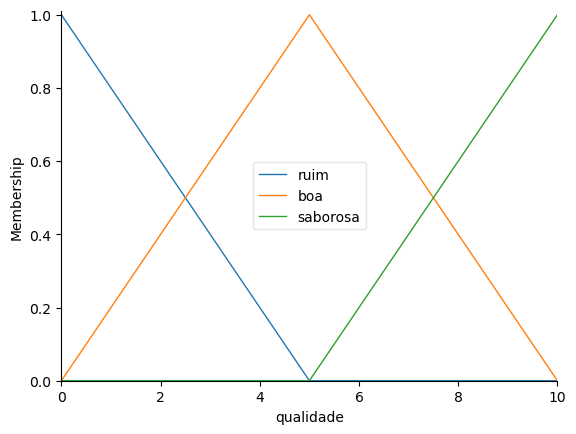

In [102]:
qualidade.view()

/home/thiago/.local/lib/python3.10/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


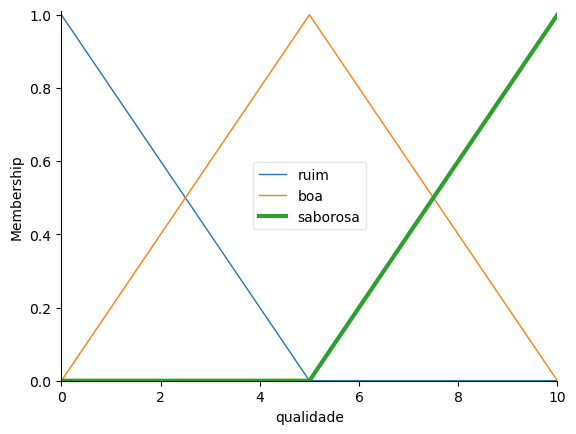

In [103]:
qualidade['saborosa'].view()

/home/thiago/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


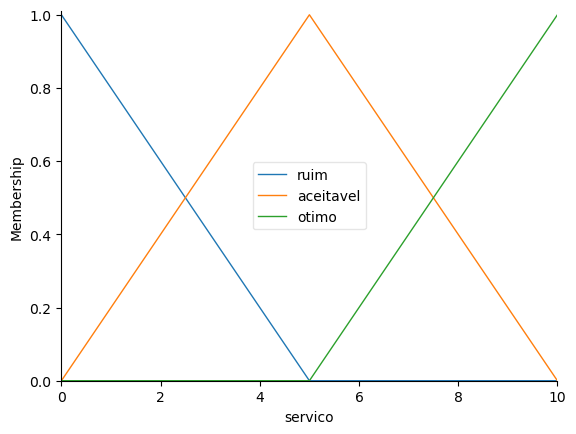

In [104]:
servico.view()

In [112]:
# gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 8])
# gorjeta['media'] = fuzz.trimf(gorjeta.universe, [2, 10, 18])
# gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [12, 20, 20])

gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5, -1)
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 10, 3)
gorjeta['alta'] = fuzz.pimf(gorjeta.universe, 10, 20, 20, 21)

/home/thiago/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


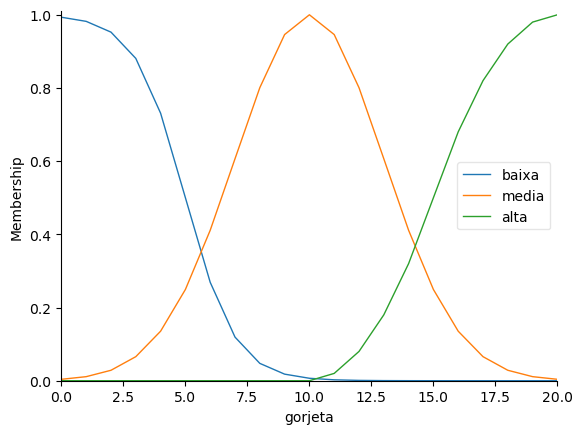

In [113]:
gorjeta.view()

In [114]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitavel'], gorjeta['media'])
regra3 = ctrl.Rule(qualidade['saborosa'] | servico['otimo'], gorjeta['alta'])


## Sistema de controle

In [115]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [117]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [118]:
sistema.input['qualidade'] = 10
sistema.input['servico'] = 10
sistema.compute()

17.06666666666667


/home/thiago/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


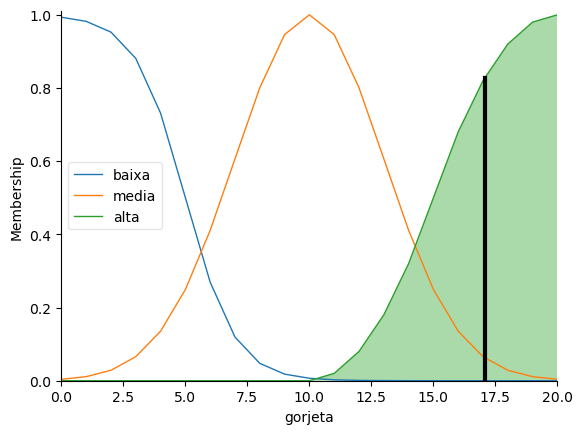

In [119]:
print(sistema.output['gorjeta'])
gorjeta.view(sim=sistema)